# YOLOPose Keypoint Prediction
This notebook demonstrates how to use a YOLOPose model to predict keypoints on an image.

In [60]:
import cv2
from ultralytics import YOLO

In [61]:
# Load the pre-trained YOLOPose model
model = YOLO('../../train_v3/weights/best.pt')  # Ensure the model file is in the correct path

In [62]:
# Load an image
image_path = '../../yolopose_v3/predict/53367_1_13.jpg'  # Replace with your image path
image = cv2.imread(image_path)

In [63]:
# Run prediction
results = model(image)


0: 640x512 1 person, 60.3ms
Speed: 2.4ms preprocess, 60.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


In [64]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[ 52,  56,  84],
        [ 52,  56,  84],
        [ 52,  56,  84],
        ...,
        [ 50,  54,  82],
        [ 49,  53,  81],
        [ 49,  53,  81]],

       [[ 52,  56,  84],
        [ 52,  56,  84],
        [ 52,  56,  84],
        ...,
        [ 50,  54,  82],
        [ 49,  53,  81],
        [ 49,  53,  81]],

       [[ 52,  56,  84],
        [ 52,  56,  84],
        [ 52,  56,  84],
        ...,
        [ 50,  54,  82],
        [ 49,  53,  81],
        [ 49,  53,  81]],

       ...,

       [[157, 181, 187],
        [131, 155, 161],
        [ 78, 102, 108],
        ...,
        [165, 179, 191],
        [148, 162, 174],
        [146, 160, 172]],

       [[160, 184, 190],
        [135, 159, 165],
        [ 83, 107, 113],
        ...,
        [155, 169, 181]

In [65]:
print(results[0].keypoints)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9094, 0.8489, 0.8563, 0.8778, 0.8472, 0.9732, 0.9834, 0.9917, 0.9945, 0.9928, 0.9934, 0.9244, 0.9237, 0.9970, 0.9968, 0.7856, 0.5708]])
data: tensor([[[ 23.6017,  52.9529,   0.9094],
         [ 19.6718,  46.1788,   0.8489],
         [ 20.1590,  46.9877,   0.8563],
         [ 30.0797,  37.3779,   0.8778],
         [ 30.8721,  37.7731,   0.8472],
         [ 67.6831,  47.6226,   0.9732],
         [ 68.2388,  51.0111,   0.9834],
         [ 88.9019,  83.4044,   0.9917],
         [ 88.5614,  89.4858,   0.9945],
         [ 80.5729, 124.9970,   0.9928],
         [ 79.8652, 131.7032,   0.9934],
         [136.6772,  61.7142,   0.9244],
         [139.8021,  64.5220,   0.9237],
         [ 92.7445, 133.2979,   0.9970],
         [ 91.6278, 139.7185,   0.9968],
         [ 94.9223, 196.3392,   0.7856],
         [ 95.6254, 206.0990,   0.5708]]])
has_visible: True
orig_shape: (220, 170)
shape: torch.Size([1, 17, 3])
xy: tenso

In [66]:
print(results[0].keypoints.data[0])

tensor([[ 23.6017,  52.9529,   0.9094],
        [ 19.6718,  46.1788,   0.8489],
        [ 20.1590,  46.9877,   0.8563],
        [ 30.0797,  37.3779,   0.8778],
        [ 30.8721,  37.7731,   0.8472],
        [ 67.6831,  47.6226,   0.9732],
        [ 68.2388,  51.0111,   0.9834],
        [ 88.9019,  83.4044,   0.9917],
        [ 88.5614,  89.4858,   0.9945],
        [ 80.5729, 124.9970,   0.9928],
        [ 79.8652, 131.7032,   0.9934],
        [136.6772,  61.7142,   0.9244],
        [139.8021,  64.5220,   0.9237],
        [ 92.7445, 133.2979,   0.9970],
        [ 91.6278, 139.7185,   0.9968],
        [ 94.9223, 196.3392,   0.7856],
        [ 95.6254, 206.0990,   0.5708]])


In [67]:
# # Extract keypoints
# for result in results:
#     keypoints = result.keypoints 
#     keypoint = result.keypoints.data[0]
#     print("Keypoints:", keypoints)  # Print to inspect the structure

#     # Check if keypoints is a list of tuples or another structure
#     for kp in keypoint:
#         if isinstance(kp, (list, tuple)) and len(kp) == 3: #keypoints variable contains tuples with three elements (x, y, visibility) as expected
#             x, y, v = kp  # x, y coordinates and visibility
#             if v > 0:  # If the keypoint is visible
#                 cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), -1)
#         else:
#             print(f"Unexpected keypoint format: {kp}")

# Assuming 'results' is the output from the model
for result in results:
    keypoints = result.keypoints 
    keypoint = result.keypoints.data[0]  # Access the keypoints data
    print("Keypoints:", keypoints)  # Print to inspect the structure
    print("Keypoint:", keypoint)

    # Iterate over each keypoint
    for kp in keypoint:
        x, y, v = kp  # Extract x, y coordinates and visibility
        if v > 0:  # Check if the keypoint is visible
            cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), -1)  # Draw the keypoint

Keypoints: ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9094, 0.8489, 0.8563, 0.8778, 0.8472, 0.9732, 0.9834, 0.9917, 0.9945, 0.9928, 0.9934, 0.9244, 0.9237, 0.9970, 0.9968, 0.7856, 0.5708]])
data: tensor([[[ 23.6017,  52.9529,   0.9094],
         [ 19.6718,  46.1788,   0.8489],
         [ 20.1590,  46.9877,   0.8563],
         [ 30.0797,  37.3779,   0.8778],
         [ 30.8721,  37.7731,   0.8472],
         [ 67.6831,  47.6226,   0.9732],
         [ 68.2388,  51.0111,   0.9834],
         [ 88.9019,  83.4044,   0.9917],
         [ 88.5614,  89.4858,   0.9945],
         [ 80.5729, 124.9970,   0.9928],
         [ 79.8652, 131.7032,   0.9934],
         [136.6772,  61.7142,   0.9244],
         [139.8021,  64.5220,   0.9237],
         [ 92.7445, 133.2979,   0.9970],
         [ 91.6278, 139.7185,   0.9968],
         [ 94.9223, 196.3392,   0.7856],
         [ 95.6254, 206.0990,   0.5708]]])
has_visible: True
orig_shape: (220, 170)
shape: torch.Size([1, 17, 3]

In [68]:
# Display the image with keypoints
cv2.imshow('Keypoints', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

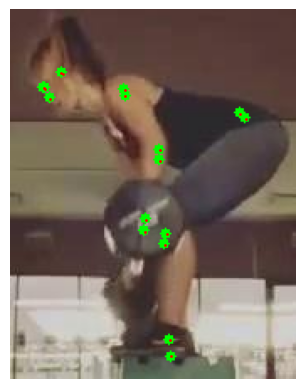

In [69]:
import matplotlib.pyplot as plt

# Assuming results is a list and we take the first result
keypoints2 = results[0].keypoints.data[0]  # Access the data attribute

# Display the image with keypoints using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')  # Hide axis

# Draw keypoints
for kp in keypoints2:
    # print(kp)
    x, y, v = kp  # x, y coordinates and visibility
    if v > 0:  # If the keypoint is visible
        plt.scatter(x, y, c='r', s=1)  # Draw keypoint

plt.show()

In [71]:
results = model.predict(image_path, show = True, save = True)


image 1/1 c:\Users\UDESIAS\Documents\FYP\Fine-Tune\yolopose_v3\predict\..\..\yolopose_v3\predict\53367_1_13.jpg: 640x512 1 person, 85.1ms
Speed: 2.3ms preprocess, 85.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to c:\Users\UDESIAS\Documents\FYP\CNN-GCN-Pipeline\runs\pose\predict24
